C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



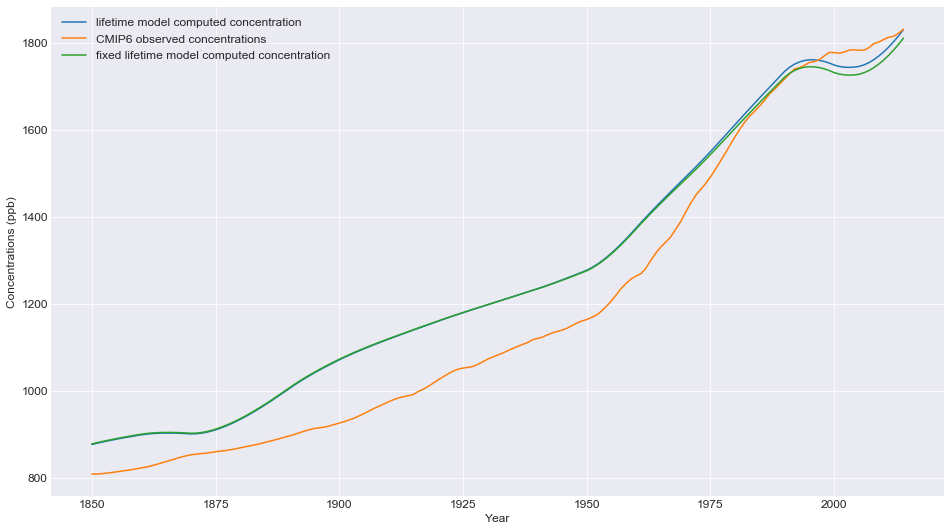

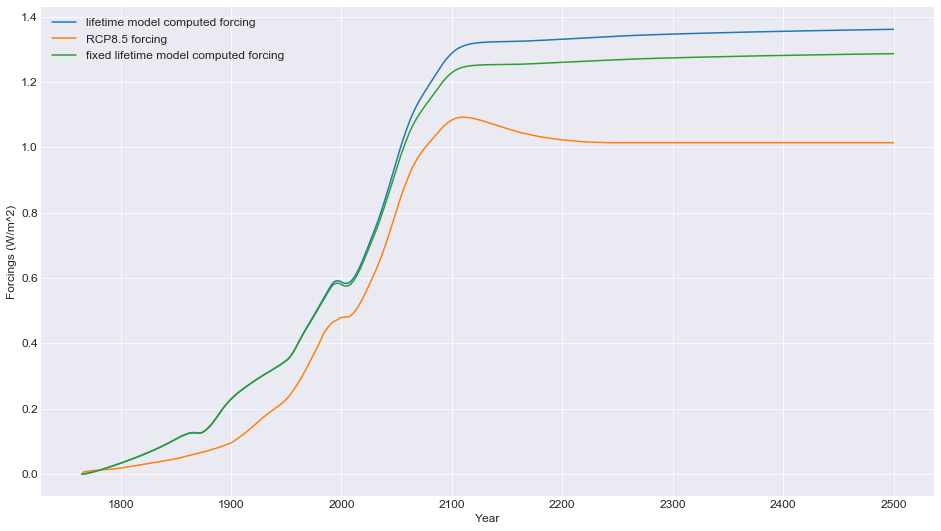

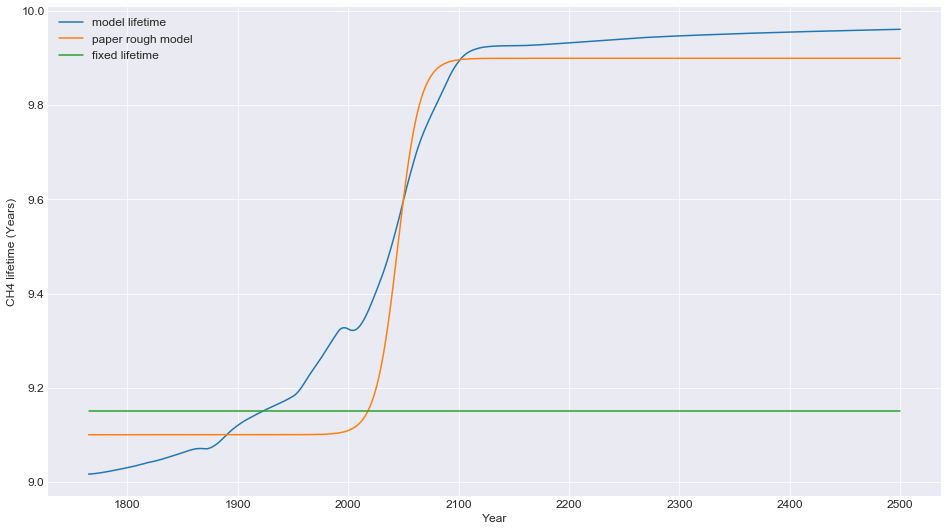

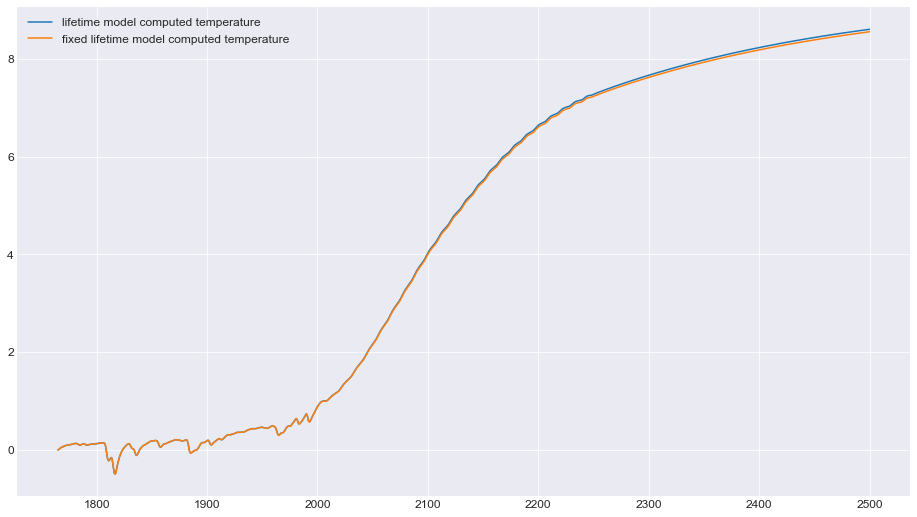

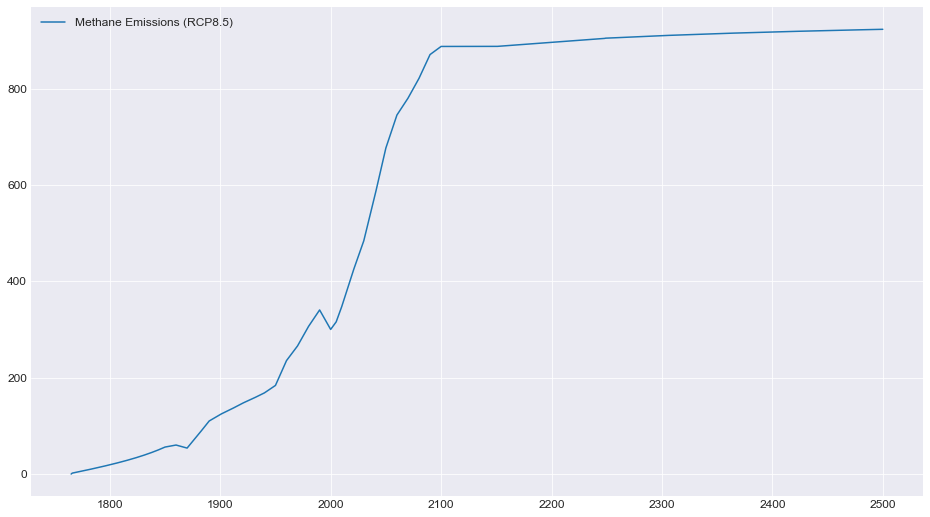

In [53]:
# m0=1.09695522e+01,mM= 4.38693352e-04  ,mT= -1.72202591e-03 work for the model shape

M_RF = forc_data['CH4_RF']

C,T,RF,M,N,MK_gas,db,tau = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,
                            other_rf=other_rf,m0=11,mM= 0.00045  ,mT= -0.002)

#fair.forward.plot_fair(emissions,M_emissions,N_emissions,
#              C,M,N,
#              other_rf,
#              T,
#              y_0=1765,
#              tuts='yrs')



C_fix,T_fix,RF_fix,M_fix,N_fix,MK_gas_fix,db_fix,tau_fix = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,
                            other_rf=other_rf,m0=11.2,mM=0,mT=0)

time = concs_data['YEAR']

fig = plt.figure()
plt.plot(time,M[85:250], label= 'lifetime model computed concentration')
plt.plot(time,M_concs,label='CMIP6 observed concentrations')
plt.plot(time,M_fix[85:250],label='fixed lifetime model computed concentration')
plt.xlabel("Year")
plt.ylabel("Concentrations (ppb)")
plt.legend(loc='best')

fig2 = plt.figure()
plt.plot(np.arange(1765,2501),db['CH4']['forcing'],label='lifetime model computed forcing')
plt.plot(np.arange(1765,2501),M_RF,label='RCP8.5 forcing')
plt.plot(np.arange(1765,2501),db_fix['CH4']['forcing'],label='fixed lifetime model computed forcing')
plt.xlabel("Year")
plt.ylabel("Forcings (W/m^2)")
plt.legend(loc='best')

fig3 = plt.figure()
plt.plot(np.arange(1765,2501),tau,label = 'model lifetime')
plt.plot(np.arange(1765,2501),tau_model,label='paper rough model')
plt.plot(np.arange(1765,2501),tau_fix,label = 'fixed lifetime')
plt.xlabel("Year")
plt.ylabel("CH4 lifetime (Years)")
plt.legend(loc='best')

fig4 = plt.figure()
plt.plot(np.arange(1765,2501),T,label='lifetime model computed temperature' )
plt.plot(np.arange(1765,2501),T_fix,label = 'fixed lifetime model computed temperature')
plt.legend(loc='best')

fig5 = plt.figure()
plt.plot(np.arange(1765,2501),M_emissions,label='Methane Emissions (RCP8.5)' )
plt.legend(loc='best')

In [51]:
concs_file = './fair/GCP_data/cmip6_histGHGConcentrations.csv'
concs_data = np.genfromtxt(concs_file,skip_header=21,delimiter=',',names=True)
M_concs = concs_data['CH4']


emms_file = './fair/RCPs/RCP85_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
M_emissions = emms_data['CH4']
emissions = np.zeros(len(M_emissions))
N_emissions = np.zeros(len(M_emissions))

forc_file = './fair/RCPs/RCP85_MIDYEAR_RADFORCING.csv'
forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CH4_RF']

time = np.arange(0,736) - 280
tau_model = 9.5 + 0.4*np.tanh(0.05*time)

def func(x):
    C,T,RF_un,M,N,MK_gas,db,tau = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,
                            other_rf=other_rf,m0=x[0],mM=x[1],mT=x[2])
    diff = M[86:251] - M_concs # diference of concs
    diff = db['CH4']['forcing'] - M_RF # diference of forcings
    #diff = np.array(diff)
    #diff = tau - tau_model # difference of rough acp paper model Holmes 2013 lifetime
    
    return diff

from scipy.optimize import least_squares

optim = least_squares(func,[10.0,0.003,-1],bounds=([8.0,0,-10],[12.0,10,0]))
print optim.x

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[  8.00000000e+00   7.67945058e-04  -2.68746178e-01]


C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:17: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



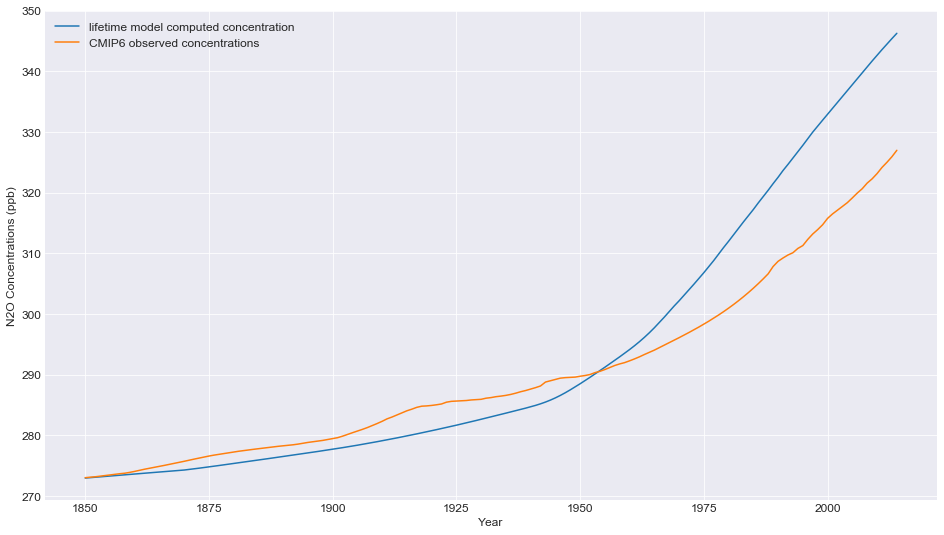

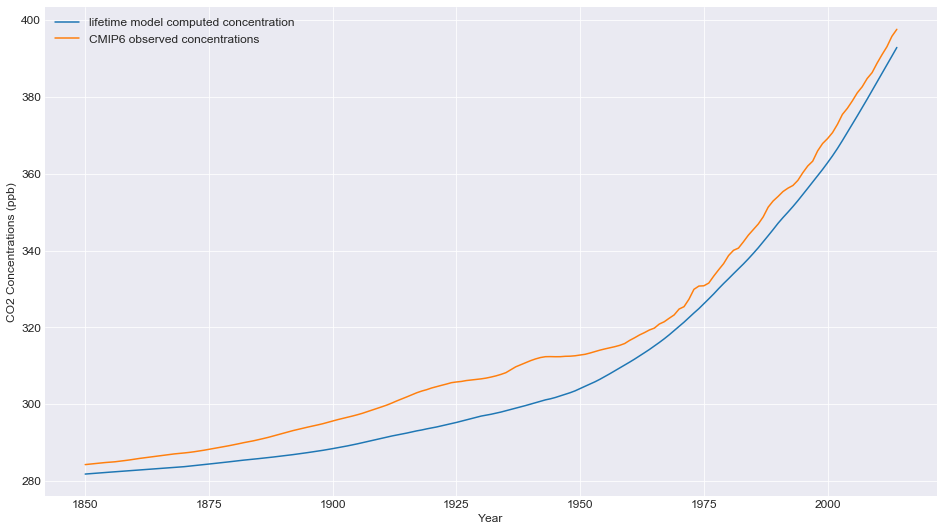

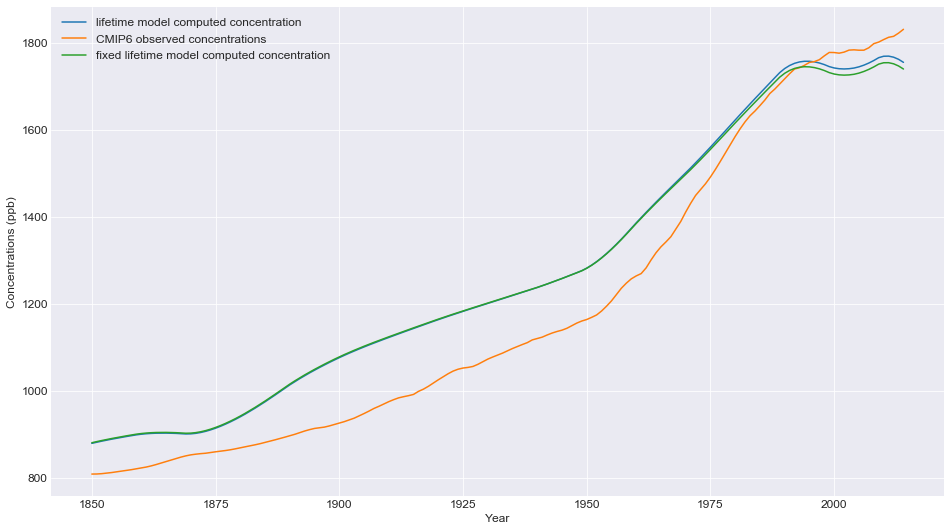

In [49]:
# gas concentration testing

emms_file = './fair/RCPs/RCP3PD_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
N_emissions = emms_data['N2O'] * 44.0 / 28.0 # convert to MtN2O from MtN2O-N
emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
M_emissions = emms_data['CH4']

other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['N2O_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF']



C,T,RF,M,N,MK_gas,db,tau = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,
                            other_rf=other_rf,m0=11,mM= 0.0004  ,mT= -0.002)

C_fix,T_fix,RF_fix,M_fix,N_fix,MK_gas_fix,db_fix,tau_fix = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,
                            other_rf=other_rf,m0=11.2,mM=0,mT=0)

concs = concs_data['CO2']
N_concs = concs_data['N2O']
M_concs = concs_data['CH4']

time = concs_data['YEAR']

fig = plt.figure()
plt.plot(time,N[86:251], label= 'lifetime model computed concentration')
plt.plot(time,N_concs,label='CMIP6 observed concentrations')
plt.xlabel("Year")
plt.ylabel("N2O Concentrations (ppb)")
plt.legend(loc='best')

fig = plt.figure()
plt.plot(time,C[86:251], label= 'lifetime model computed concentration')
plt.plot(time,concs,label='CMIP6 observed concentrations')
plt.xlabel("Year")
plt.ylabel("CO2 Concentrations (ppb)")
plt.legend(loc='best')

fig = plt.figure()
plt.plot(time,M[86:251], label= 'lifetime model computed concentration')
plt.plot(time,M_concs,label='CMIP6 observed concentrations')
plt.plot(time,M_fix[86:251],label='fixed lifetime model computed concentration')
plt.xlabel("Year")
plt.ylabel("Concentrations (ppb)")
plt.legend(loc='best')

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['lines.linewidth'] = 1.5

font = {'weight' : 'normal',
      'size'   : 12}

plt.rc('font', **font)

import fair
fair.__version__

'1.0.1'

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:31: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



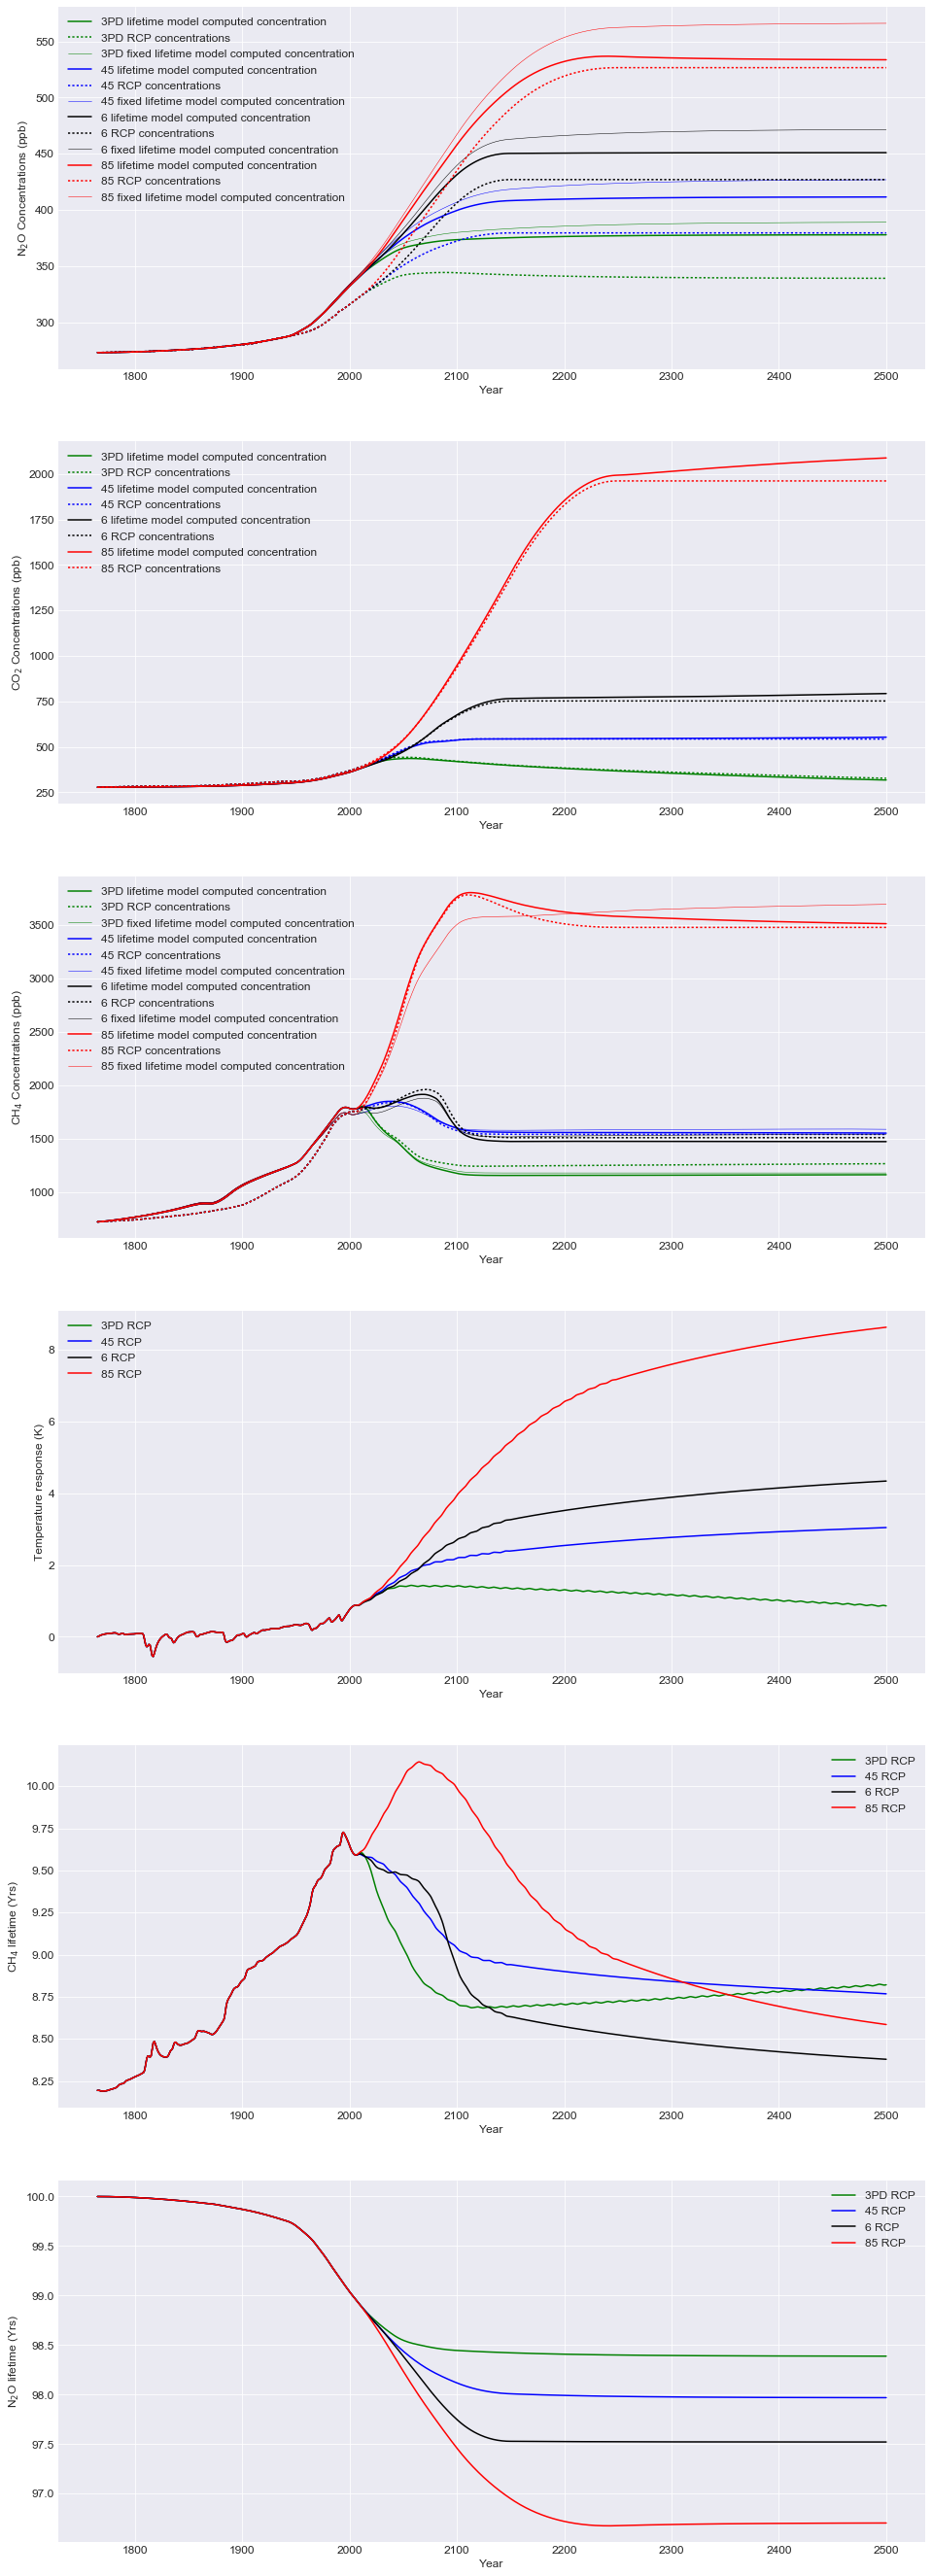

In [2]:
# gas concentration testing using 1765-2500 concentrations from RCPs

fig = plt.figure(figsize=(16,48))
ax1 = fig.add_subplot(6,1,1)
ax2 = fig.add_subplot(6,1,2)
ax3 = fig.add_subplot(6,1,3)
ax4 = fig.add_subplot(6,1,4)
ax5 = fig.add_subplot(6,1,5)
ax6 = fig.add_subplot(6,1,6)

RCPs = ['3PD','45','6','85']
colours = ['green','blue','black','red']

for i,x in enumerate(RCPs):

    emms_file = './fair/RCPs/RCP'+ x + '_EMISSIONS.csv'
    emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
    N_emissions = emms_data['N2O'] * 44.0 / 28.0 # convert from MtN2O-N to MtN2O
    emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
    M_emissions = emms_data['CH4']


    forc_file = './fair/RCPs/RCP' + x + '_MIDYEAR_RADFORCING.csv'
    forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
    other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['N2O_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF']

    # m0 below comes from using a default CH4 lifetime of 9.15 as in Holmes et al.
    # The values of m0 = 11.2, mM = 0.0004, mT = -0.002 work well, literature (& MAGICC) suggests m0 = 11.9, mM = 0.00044, mT = -0.03 
    C,T,RF,M,N,MK_gas,db,tau_M,tau_N = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,N_emissions=N_emissions,
                            other_rf=other_rf,m0=11.2, mM=0.00044, mT= -0.03, N_0=273.0,MAGICC_model = True,
                            S_OH_CH4 = -0.25, S_T_CH4 = 0.0316, tau_M_0 = 9.8,tau_N_0=100.0)

    C_fix,T_fix,RF_fix,M_fix,N_fix,MK_gas_fix,db_fix,tau_M_fix,tau_N_fix = fair.forward.fair_scm(emissions=emissions,
                            M_emissions=M_emissions,N_emissions=N_emissions, N_0=273.0,
                            other_rf=other_rf,m0=11.2,mM=0,mT=0)

    concs_filem = './fair/GCP_data/RCP'+ x +'_MIDYEAR_CONCENTRATIONS.csv'
    concs_datam = np.genfromtxt(concs_filem,skip_header=37,delimiter=',',names=True)
    M_concs = concs_datam['CH4']
    N_concs = concs_datam['N2O']
    concs = concs_datam['CO2']

    time = np.arange(1765,2501)

    ax1.plot(time,N, label= x + ' lifetime model computed concentration',color = colours[i])
    ax1.plot(time,N_concs,':',label= x + ' RCP concentrations',color = colours[i])
    ax1.plot(time,N_fix,linewidth = 0.5 ,label= x + ' fixed lifetime model computed concentration',color = colours[i])
    ax1.set_xlabel("Year")
    ax1.set_ylabel("N$_2$O Concentrations (ppb)")
    ax1.legend(loc='best')

    ax2.plot(time,C, label= x + ' lifetime model computed concentration',color = colours[i])
    ax2.plot(time,concs,':',label= x + ' RCP concentrations',color = colours[i])
    ax2.set_xlabel("Year")
    ax2.set_ylabel("CO$_2$ Concentrations (ppb)")
    ax2.legend(loc='best')

    ax3.plot(time,M, label= x + ' lifetime model computed concentration',color = colours[i])
    ax3.plot(time,M_concs,':',label= x + ' RCP concentrations',color = colours[i])
    ax3.plot(time,M_fix,linewidth=0.5,label=x + ' fixed lifetime model computed concentration',color = colours[i])
    ax3.set_xlabel("Year")
    ax3.set_ylabel("CH$_4$ Concentrations (ppb)")
    ax3.legend(loc='best')
    
    ax4.plot(time,T, label= x + ' RCP',color = colours[i])
    ax4.set_xlabel("Year")
    ax4.set_ylabel("Temperature response (K)")
    ax4.legend(loc='best')
    
    ax5.plot(time,tau_M, label= x + ' RCP',color = colours[i])
    ax5.set_xlabel("Year")
    ax5.set_ylabel("CH$_4$ lifetime (Yrs)")
    ax5.legend(loc='best')
    
    ax6.plot(time,tau_N, label= x + ' RCP',color = colours[i])
    ax6.set_xlabel("Year")
    ax6.set_ylabel("N$_2$O lifetime (Yrs)")
    ax6.legend(loc='best')

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:28: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:32: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:3

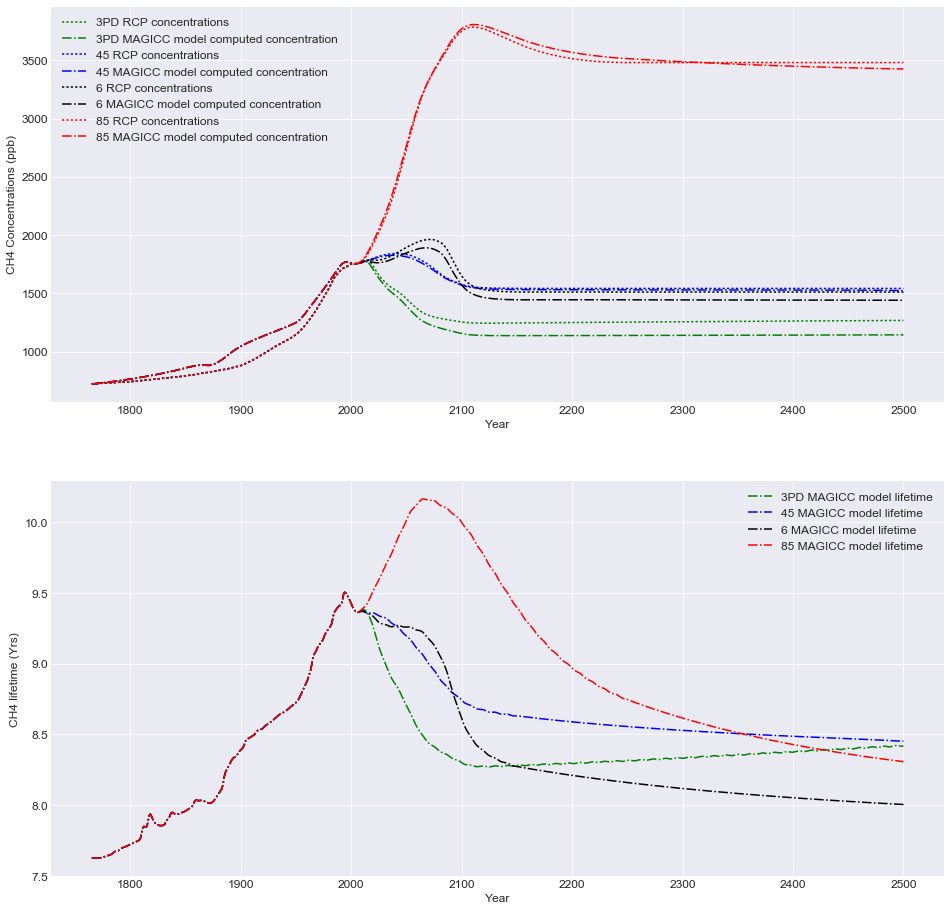

In [29]:
#methane lifetime model comaprison vs MAGICC

# gas concentration testing using 1765-2500 concentrations from RCPs

fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

RCPs = ['3PD','45','6','85']
colours = ['green','blue','black','red']

for i,x in enumerate(RCPs):

    emms_file = './fair/RCPs/RCP'+ x + '_EMISSIONS.csv'
    emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)
    N_emissions = emms_data['N2O'] * 44.0 / 28.0 # convert to MtN2O from MtN2O-N
    emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
    M_emissions = emms_data['CH4']


    forc_file = './fair/RCPs/RCP' + x + '_MIDYEAR_RADFORCING.csv'
    forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
    other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF']

    # m0 below comes from using a default CH4 lifetime of 9.15 as in Holmes et al.
    # The values of m0 = 11.2, mM = 0.0004, mT = -0.002 work well, literature (& MAGICC) suggests m0 = 11.9, mM = 0.00044, mT = -0.03 
    C,T,RF,M,N,MK_gas,db,tau,tau_N = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,
                            other_rf=other_rf,m0=11.2, mM=0.00044, mT= -0.03)

    C_fix,T_fix,RF_fix,M_fix,N_fix,MK_gas_fix,db_fix,tau_fix,tau_N_fix = fair.forward.fair_scm(emissions=emissions,
                            M_emissions=M_emissions,
                            other_rf=other_rf,m0=11.2,mM=0,mT=0)
    
    C_MAG,T_MAG,RF_MAG,M_MAG,N_MAG,MK_gas_MAG,db_MAG,tau_MAG,tau_N_MAG = fair.forward.fair_scm(emissions=emissions,
                            M_emissions=M_emissions,
                            other_rf=other_rf,m0=11.2, mM=0.00044, mT= -0.03,MAGICC_model = True,
                            S_OH_CH4 = -0.32, S_T_CH4 = 0.0316, tau_M_0 = 9.0)

    concs_filem = './fair/GCP_data/RCP'+ x +'_MIDYEAR_CONCENTRATIONS.csv'
    concs_datam = np.genfromtxt(concs_filem,skip_header=37,delimiter=',',names=True)
    M_concs = concs_datam['CH4']
    N_concs = concs_datam['N2O']
    concs = concs_datam['CO2']

    time = np.arange(1765,2501)

    #ax1.plot(time,M, label= x + ' lifetime model computed concentration',color = colours[i])
    ax1.plot(time,M_concs,':',label= x + ' RCP concentrations',color = colours[i])
    #ax1.plot(time,M_fix,linewidth = 0.5 ,label= x + ' fixed lifetime model computed concentration',color = colours[i])
    ax1.plot(time,M_MAG, '-.', label= x + ' MAGICC model computed concentration',color = colours[i])
    ax1.set_xlabel("Year")
    ax1.set_ylabel("CH4 Concentrations (ppb)")
    ax1.legend(loc='best')

    #ax2.plot(time,tau, label= x + ' lifetime model lifetime',color = colours[i])
    ax2.plot(time,tau_MAG,'-.',label= x + ' MAGICC model lifetime',color = colours[i])
    ax2.set_xlabel("Year")
    ax2.set_ylabel("CH4 lifetime (Yrs)")
    ax2.legend(loc='best')

In [25]:
emms_file = './fair/RCPs/RCP3PD_EMISSIONS.csv'
emms_data = np.genfromtxt(emms_file,skip_header=36,delimiter=',',names=True)

emissions = emms_data['FossilCO2'] + emms_data['OtherCO2']
M_emissions = M_emissions = emms_data['CH4']

concs_filem = './fair/GCP_data/RCP'+ x +'_MIDYEAR_CONCENTRATIONS.csv'
concs_datam = np.genfromtxt(concs_filem,skip_header=37,delimiter=',',names=True)
M_concs = concs_datam['CH4']
N_concs = concs_datam['N2O']
concs = concs_datam['CO2']

forc_file = './fair/RCPs/RCP3PD_MIDYEAR_RADFORCING.csv'
forc_data = np.genfromtxt(forc_file,skip_header=58,delimiter=',',names=True)
other_rf = forc_data['TOTAL_INCLVOLCANIC_RF'] - forc_data['CO2_RF'] - forc_data['CH4_RF']


def func(x):
    C,T,RF,M,N,MK_gas,db,tau,tau_N = fair.forward.fair_scm(emissions=emissions,M_emissions=M_emissions,
                            other_rf=other_rf,
                            MAGICC_model = True, S_OH_CH4 = x[0], S_T_CH4 = x[1], tau_M_0 = x[2])
    diff = M[250:] - M_concs[250:] # diference of concs
    #diff = db['CH4']['forcing'] - M_RF # diference of forcings
    diff = np.array(diff)
    #diff = tau - tau_model # difference of rough acp paper model Holmes 2013 lifetime
    
    return diff

from scipy.optimize import least_squares

optim = least_squares(func,[-0.32,0.0316,9.6])
print optim.x

C:\Users\leach_000\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.



[-0.45841751 -0.28001962  8.51829952]


In [31]:
print M_MAG[240]
print M_concs[240]

1754.60543441
1753.735
